In [7]:
import pyscf
from pyscf import gto
from pyscf import scf
from pyscf import dft
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#dft calculation

In [8]:
#find density matrix
mol_h2 = gto.M(atom = 'H 0 0 0; H 0 0 0.74', basis = 'sto-3g', symmetry = True)
#spin=spinup-spindown
#charge=H_2+,charge=1(2 nuclei, 2 electron)
mf_h2 = dft.RKS(mol_h2)#restricted closed shell Kohn Sham DFT calculation
#run scf loop automatically
mf_h2.kernel()
#the density matrix after scf loop
dm=mf_h2.make_rdm1()
print(dm)


converged SCF energy = -1.12120611516684
[[0.60245569 0.60245569]
 [0.60245569 0.60245569]]


In [10]:

# Total energy
print(f"Total energy: {mf_h2.e_tot} Hartree")

mf_h2.verbose = 0
# get_veff calculates columb energy (J) + XC, and each part is accessbile with .ecoul or .exc
# Coulomb energy (Hartree energy)
print(f"Coulomb energy: {mf_h2.get_veff().ecoul} Hartree")
# Exchange-correlation energy
print(f"Exchange-correlation energy: {mf_h2.get_veff().exc} Hartree")

# Nuclear repulsion energy
print(f"Nuclear repulsion energy: {mf_h2.energy_nuc()} Hartree")

# note we can also access the electronic energy with energy_elec(), which returns: (electronic energy, 2electron contribution)
print(f"Electronic energy: {mf_h2.energy_elec()[0]} Hartree")

Total energy: -0.7795432971713222 Hartree
Coulomb energy: 0.9056130370553956 Hartree
Exchange-correlation energy: -0.6174798416564593 Hartree
Nuclear repulsion energy: 0.13229430273 Hartree
Electronic energy: -0.9118375999013222 Hartree


converged SCF energy = 0.173239132145609
converged SCF energy = -0.20742236949966
converged SCF energy = -0.467258306102571
converged SCF energy = -0.650755756491558
converged SCF energy = -0.78333649447365
converged SCF energy = -0.880555653080775
converged SCF energy = -0.952420134614797
converged SCF energy = -1.00562373897985
converged SCF energy = -1.04479427815996
converged SCF energy = -1.07322864511825
converged SCF energy = -1.09334235960627
converged SCF energy = -1.10695064732916
converged SCF energy = -1.11544675868677
converged SCF energy = -1.11991677551094
converged SCF energy = -1.12121527552582
converged SCF energy = -1.12001731890947
converged SCF energy = -1.11685616131334
converged SCF energy = -1.11215230037778
converged SCF energy = -1.10623691247221
converged SCF energy = -1.09937111733499
converged SCF energy = -1.09176192016875
converged SCF energy = -1.08357503634998
converged SCF energy = -1.07494501368619
converged SCF energy = -1.06598292474991
converged SC

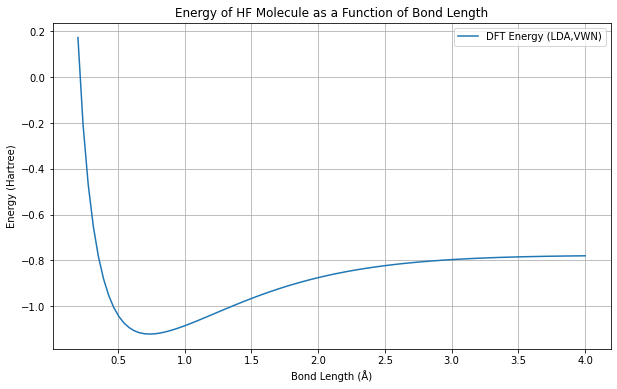

In [9]:
# Define the range of bond lengths (R) in angstroms
bond_lengths = np.linspace(0.2, 4, 100)  # Starting from 0.2 to avoid very short bond lengths

# Initialize an empty list to store the energies
energies = []

# Loop over the bond lengths
for R in bond_lengths:
    # Define the H2 molecule with the current bond length
    mol_h2 = gto.M(
        atom = f'H 0 0 0; H 0 0 {R}',  # Hydrogen1 at origin, hydrogen2 at (0, 0, R)
        basis = 'sto-3g',              # sto-3g basis set
        symmetry = True                # Enable symmetry
    )
    mol_h2.unit = 'B'
    # Set up a DFT calculation using Restricted Kohn-Sham (RKS) method
    mf_h2 = dft.RKS(mol_h2)
    mf_h2.xc = 'lda,vwn'  # Specify the exchange-correlation functional
    

    # Switch to the second-order Newton-Raphson algorithm for SCF
    mf_h2 = mf_h2.newton()
    
    # Run the SCF calculation and get the energy
    energy = mf_h2.kernel()
    
    # Append the energy to the list
    energies.append(energy)
    
    #calculate the density matrix
    dm=mf_h2.make_rdm1()
    

# Convert the energies list to a numpy array for easier plotting
energies = np.array(energies)

# Plot the energy as a function of the bond length
plt.figure(figsize=(10, 6))
plt.plot(bond_lengths, energies, label='DFT Energy (LDA,VWN)')
plt.xlabel('Bond Length (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy of HF Molecule as a Function of Bond Length')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#H atom(uks)



In [12]:
h2 = gto.M(atom =f"""
    H
    H 1 0.74
""", basis = 'cc-pvdz', spin=0)


In [13]:
#lets start with a restricted hartree fock calculation
myhf = scf.RHF(h2)
#then kernel() does the calculation
myhf.kernel()

converged SCF energy = -1.12870009355644


-1.1287000935564409

In [27]:
def fvind(dm):
    vj, vk = mf.get_jk(mol, dm)
    return 2 * vj - vk

In [28]:
converged = False
dm=dm_init_guess
for iteration in range(max_iterations):
    # Build the Fock matrix
    fock_matrix = mf.get_hcore() + fvind(dm)

    # Add level shift to the Fock matrix
    fock_matrix += np.diag(np.full(fock_matrix.shape[0], level_shift))

    # Solve the eigenvalue problem
    mo_energy, mo_coeff = mf.eig(fock_matrix, mf.get_ovlp())

    # Compute the new density matrix
    dm_new = mf.make_rdm1(mo_coeff, mf.mo_occ)

    # Check for convergence
    if np.linalg.norm(dm_new - dm) < convergence_threshold:
        converged = True
        break

    # Update the density matrix
    dm = dm_new

# Extract the total energy and exchange-correlation energy
total_energy = mf.energy_tot(dm)
exc_energy = mf.energy_elec(dm)[1]


In [ ]:
#create a HF dissociation for H2


In [29]:
print(total_energy)
print(exc_energy)

-0.8798436201297659
0.7452316060354491
